In [1]:
import matplotlib.pyplot as plt
import cv2, numpy as np

def auto_canny(img, sigma=0.33) : 
    img = cv2.GaussianBlur(img, (5, 5), 0)
    v = np.median(img)
    print(f"Average brightness:{np.mean(img):.2f}") # 평균 밝기 계산 
    print(f"Bright Contrast:{np.std(img):.2f}") # 대조 값
    lower = int(max(0, 1.0 - sigma)*v)
    upper = int(min(255, (1.0 + sigma)*v))
    edged = cv2.Canny(img, lower, upper)
    return edged

def edge_detection(img_path) :
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3,3), np.uint8)
#     erosion = cv2.erode(gray, kernel, iterations = 1)
    opening=cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    result = auto_canny(opening)
    return img, result

Average brightness:138.29
Bright Contrast:54.62
Average brightness:16.06
Bright Contrast:11.02


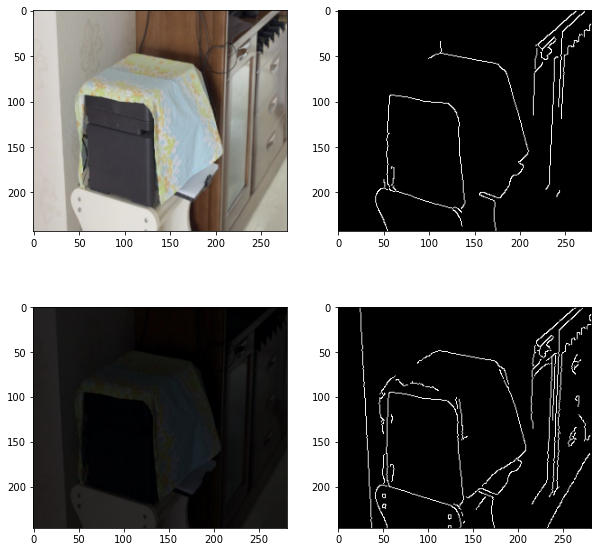

In [21]:
image1, result1 = edge_detection("./data/LOL/l4.png")
image2, result2 = edge_detection("./data/LOL/d4.png")

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

plt.subplot(222)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))

plt.subplot(223)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

plt.subplot(224)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))

Average brightness:13.59
Bright Contrast:18.76


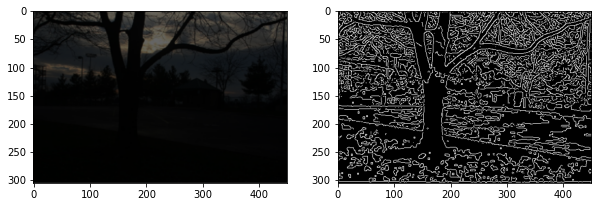

In [22]:
img,res = edge_detection("./data/dark_img2-7.png")

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Average brightness:82.51
Bright Contrast:69.64
Average brightness:41.43
Bright Contrast:55.07
Average brightness:20.98
Bright Contrast:29.54
Average brightness:17.03
Bright Contrast:23.79
Average brightness:10.09
Bright Contrast:13.78


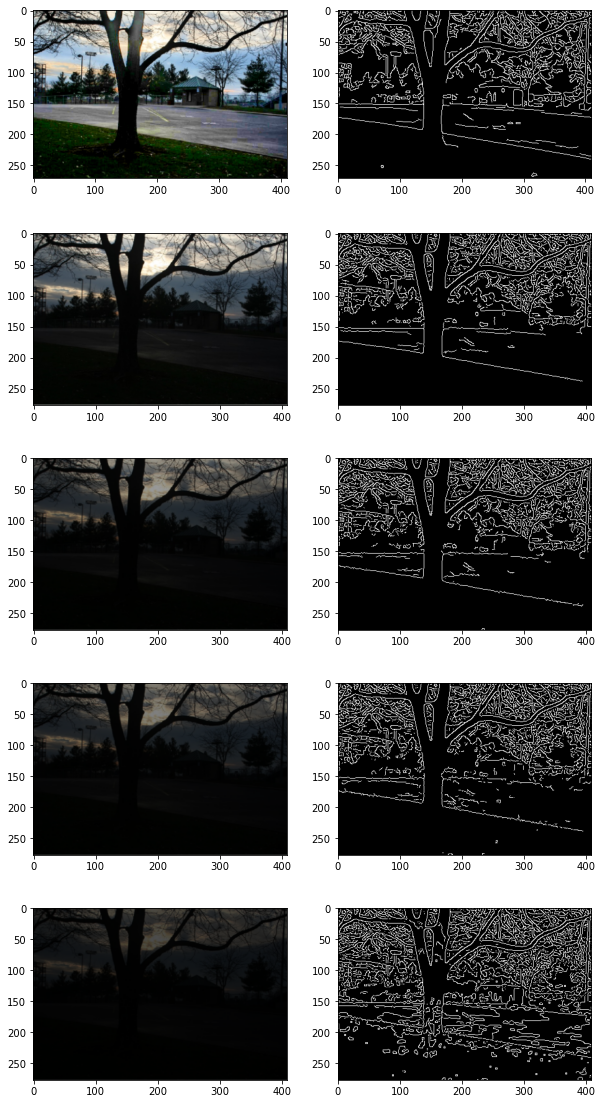

In [23]:
img1,res1 = edge_detection("./data/light_img.png")
img2,res2 = edge_detection("./data/dark_img.png")
img3,res3 = edge_detection("./data/dark_img2.png")
img4,res4 = edge_detection("./data/dark_img2-5.png")

img5,res5 = edge_detection("./data/dark_img3.png")



plt.figure(figsize=(10,20))
plt.subplot(521)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

plt.subplot(522)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))

plt.subplot(523)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.subplot(524)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))

plt.subplot(525)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

plt.subplot(526)
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))

plt.subplot(527)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

plt.subplot(528)
plt.imshow(cv2.cvtColor(res4, cv2.COLOR_BGR2RGB))

plt.subplot(529)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))

plt.subplot(5,2,10)
plt.imshow(cv2.cvtColor(res5, cv2.COLOR_BGR2RGB))

---

Average brightness:82.51
Bright Contrast:69.64


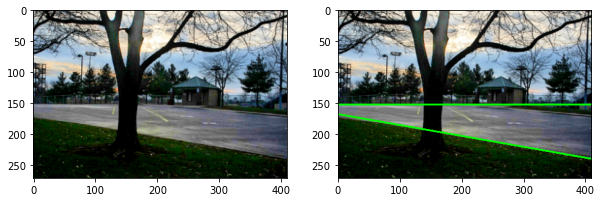

In [11]:
img1,res1 = edge_detection("./data/light_img.png")
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
lines = cv2.HoughLines(res1, 1, np.pi / 180, threshold=132)
# print(lines)
# 수평선과 수직선 필터링
horizontal_lines = []
vertical_lines = []
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # 각도를 기준으로 수평선과 수직선을 분류
        if theta < np.pi / 4 or theta > 3 * np.pi / 4:  # 수직선
            vertical_lines.append((x1, y1, x2, y2))
            cv2.line(img1, (x1, y1), (x2, y2), (255, 0, 0), 2)
        elif np.pi / 4 <= theta <= 3 * np.pi / 4:  # 수평선
            horizontal_lines.append((x1, y1, x2, y2))
            cv2.line(img1, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.subplot(122)            
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Average brightness:140.66
Bright Contrast:28.22


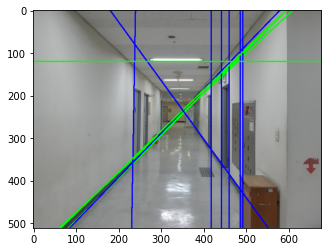

In [66]:
img1,res1 = edge_detection("./data/corridor2.png")

# print(lines)
# 수평선과 수직선 필터링
horizontal_lines = []
vertical_lines = []
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # 각도를 기준으로 수평선과 수직선을 분류
        if theta < np.pi / 4 or theta > 3 * np.pi / 4:  # 수직선
            vertical_lines.append((x1, y1, x2, y2))
            cv2.line(img1, (x1, y1), (x2, y2), (255, 0, 0), 2)
        elif np.pi / 4 <= theta <= 3 * np.pi / 4:  # 수평선
            horizontal_lines.append((x1, y1, x2, y2))
            cv2.line(img1, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Average brightness:82.51
Bright Contrast:69.64


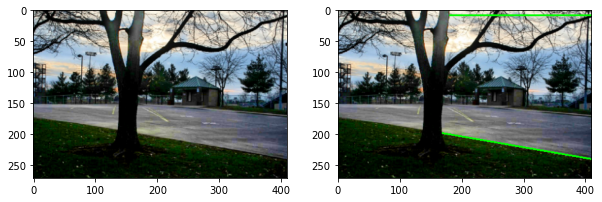

In [16]:
img1,res1 = edge_detection("./data/light_img.png")
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
lines = cv2.HoughLinesP(res1, 1, np.pi / 180, threshold=132,
                       minLineLength=100, maxLineGap=10)
# print(lines)
horizontal_lines = []
vertical_lines = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img1, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.subplot(122)                    
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Average brightness:82.51
Bright Contrast:69.64
27.774367743677438


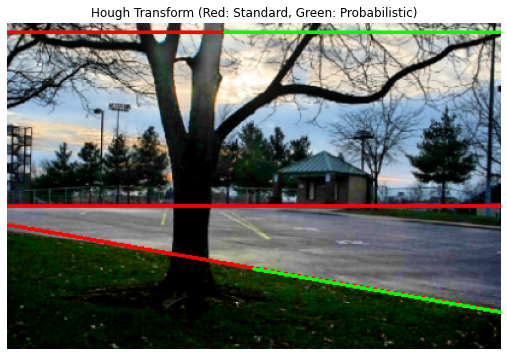

In [10]:
image, edges = edge_detection("./data/light_img.png")


# 엣지 검출을 위한 캐니 엣지 디텍터 적용
# edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# 표준 허프 변환
lines_standard = cv2.HoughLines(edges, 1, np.pi/180, 132)

# 확률적 허프 변환
lines_probabilistic = cv2.HoughLinesP(edges, 1, np.pi/180, 132, minLineLength=100, maxLineGap=10)

# 표준 허프 변환으로 찾은 직선 그리기
if lines_standard is not None:
    for line in lines_standard:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 확률적 허프 변환으로 찾은 직선 그리기
if lines_probabilistic is not None:
    for line in lines_probabilistic:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 결과 이미지 표시
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Transform (Red: Standard, Green: Probabilistic)')
plt.axis('off') # 축을 숨깁니다
plt.show()